# McKinney Chapter 5 - Practice for Section 05

## Announcements

1. No DataCamp this week, but I suggest you keep working on it
2. Keep forming groups, and I will post our first project early next week

## 10-Minute Recap

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

pandas gives us two data structures:

1. Data Frames
2. Series

A data frame is like a worksheet in an Excel workbook.

In [3]:
np.random.seed(42)
df = pd.DataFrame(
    data=np.random.randn(3, 5), # 15 random numbers
    index=list('ABC'), # labels the rows for easy indexing and slicing
    columns=list('abcde') # labels the columns for easy indexing and slicing
)

df

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,-0.2342
B,-0.2341,1.5792,0.7674,-0.4695,0.5426
C,-0.4634,-0.4657,0.2420,-1.9133,-1.7249


How can we get the first two rows and first three columns?

1. We can slice by integer location with the `.iloc[]` method
2. We can slice by names with the `.loc[]` method

In [4]:
df.iloc[:2, :3] # j,k slicing, as in NumPy

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2341,1.5792,0.7674


***When we slice by names, both left and right edges are *included*!***

In [5]:
df.loc['A':'B', 'a':'c']

,a,b,c
A,0.4967,-0.1383,0.6477
B,-0.2341,1.5792,0.7674


We can use the `.head()` method to show the first `n` rows in `df`.

In [6]:
df.head(2)

,a,b,c,d,e
A,0.4967,-0.1383,0.6477,1.5230,-0.2342
B,-0.2341,1.5792,0.7674,-0.4695,0.5426


How do I add a column?

In [7]:
df['f'] = 5 # as in NumPy, this 5 will broadcast to all the rows

df

,a,b,c,d,e,f
A,0.4967,-0.1383,0.6477,1.5230,-0.2342,5
B,-0.2341,1.5792,0.7674,-0.4695,0.5426,5
C,-0.4634,-0.4657,0.2420,-1.9133,-1.7249,5


A series is like a single column in an Excel worksheet (or a pandas data frame).

In [8]:
ser = pd.Series(data=np.arange(2.), index=list('BC'))

ser

B   0.0000
C   1.0000
dtype: float64

pandas aligns operations on row and column names

In [9]:
df['g'] = ser

df

,a,b,c,d,e,f,g
A,0.4967,-0.1383,0.6477,1.5230,-0.2342,5,NaN
B,-0.2341,1.5792,0.7674,-0.4695,0.5426,5,0.0000
C,-0.4634,-0.4657,0.2420,-1.9133,-1.7249,5,1.0000


## Practice

In [10]:
tickers = 'AAPL IBM MSFT GOOG'
prices = yf.download(tickers=tickers)

[*********************100%%**********************]  4 of 4 completed


In [11]:
returns = (
    prices['Adj Close'] # slice adj close column
    .iloc[:-1] # drop last row with intra day prices, which are sometimes missing
    .pct_change() # calculate returns
    .dropna() # drop leading rows with at least one missing value
)

returns

,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0030
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2024-01-23,0.0067,0.0066,0.0064,0.0060
2024-01-24,-0.0035,0.0112,-0.0001,0.0092
2024-01-25,-0.0017,0.0219,0.0949,0.0057


### What are the mean daily returns for these four stocks?

In [12]:
returns.mean() # default is axis=0, so we get the mean of each column

AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

We if want an equally-weighted portfolio return?
We could take the mean of each *row* with `.mean(axis=1)`.
The mean is the same as the sum of 0.25 times each of the 4 columns.

In [13]:
returns.mean(axis=1)

Date
2004-08-20    0.0224
2004-08-23    0.0041
2004-08-24   -0.0032
2004-08-25    0.0152
2004-08-26    0.0146
               ...  
2024-01-23    0.0064
2024-01-24    0.0042
2024-01-25    0.0302
2024-01-26   -0.0065
2024-01-29    0.0040
Length: 4893, dtype: float64

### What are the standard deviations of daily returns for these four stocks?

We can use the `.std()` method to find the *sample* standard deviation of each column.

In [14]:
returns.std()

AAPL   0.0206
GOOG   0.0193
IBM    0.0143
MSFT   0.0171
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

We annualize mean returns by multiplying by $T$ ($T=252$ for daily returns, $T=12$ for month returns, and so on).
We annualize standard deviations by multiplying by $\sqrt(T)$.

In [15]:
returns.mean().mul(252) # whenever I can, I use the .mul() method, so I can keep chaining!

AAPL   0.3640
GOOG   0.2594
IBM    0.0981
MSFT   0.2010
dtype: float64

In [16]:
returns.std().mul(np.sqrt(252))

AAPL   0.3276
GOOG   0.3070
IBM    0.2271
MSFT   0.2722
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

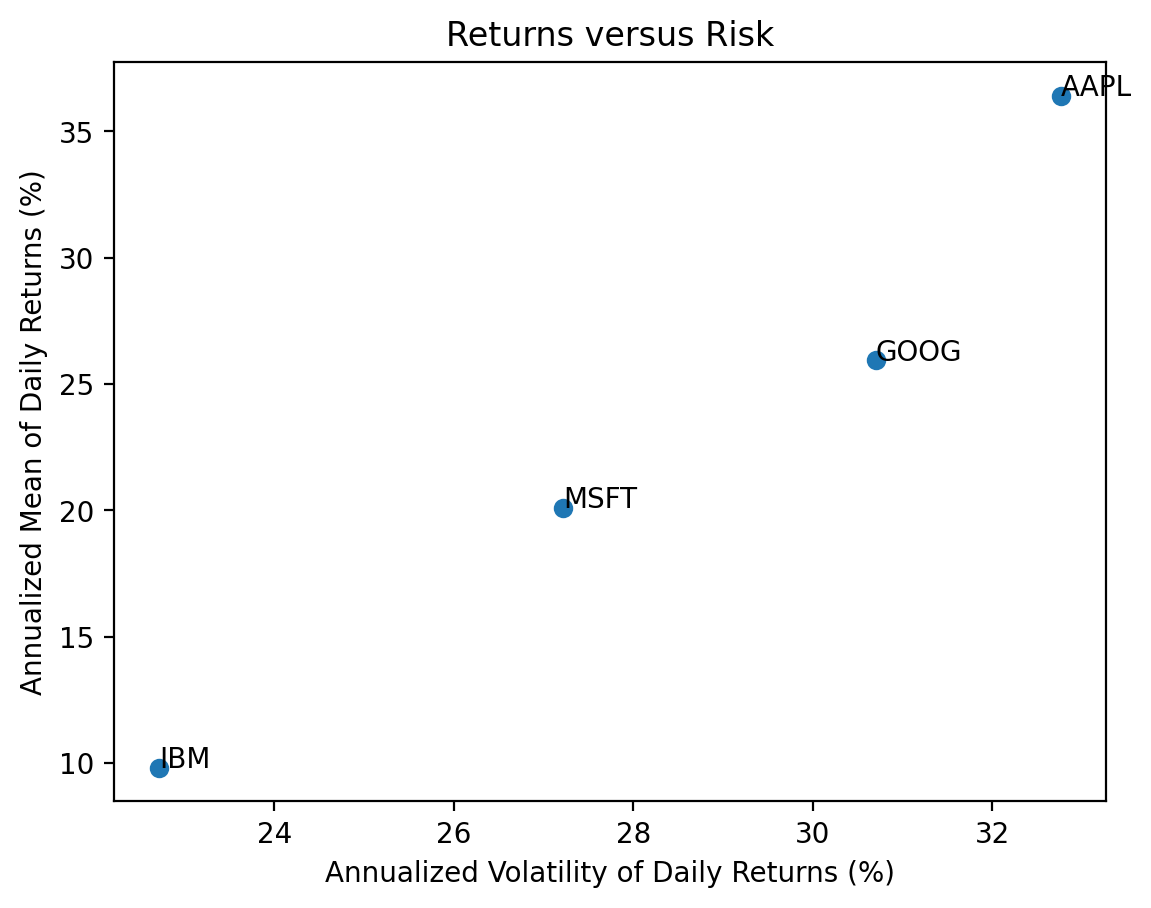

In [17]:
vols = returns.std().mul(np.sqrt(252) * 100)
means = returns.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means
)

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

# plt.xlim((0, vols.max() + 5))
# plt.ylim((0, means.max() + 5))

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.title('Returns versus Risk')
plt.show() # suppresses output of last function call

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

In [18]:
url2 = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
wiki2 = pd.read_html(io=url2)
tickers2 = wiki2[1]['Symbol'].to_list()
prices2 = yf.download(tickers=tickers2)

[*********************100%%**********************]  30 of 30 completed


In [19]:
returns2 = (
    prices2['Adj Close'] # slices the adj close group of columns from prices
    .iloc[:-1] # drop last row (which is intraday during class) to avoid fill_method warning
    .pct_change() # calculate percent in adj closes (row[n] - row[n-1]) / row[n-1]
    .dropna() # drops rows with any missing values
)

returns2

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-21,0.0368,0.0040,0.0095,-0.0092,0.0079,0.0210,0.0128,0.0094,-0.0121,-0.0165,...,0.0106,0.0230,0.0152,0.0076,0.0231,0.0061,0.0133,0.0108,0.0129,0.0043
2019-03-22,-0.0207,-0.0270,-0.0211,-0.0283,-0.0320,-0.0326,-0.0222,-0.0220,-0.0040,-0.0078,...,-0.0080,-0.0264,-0.0661,-0.0081,0.0039,-0.0196,-0.0175,0.0252,-0.0187,-0.0079
2019-03-25,-0.0121,-0.0006,-0.0038,0.0229,0.0124,-0.0038,-0.0002,-0.0016,-0.0041,0.0113,...,0.0007,0.0052,0.0017,0.0030,0.0004,-0.0009,-0.0003,0.0054,-0.0115,-0.0011
2019-03-26,-0.0103,0.0090,0.0042,-0.0002,0.0035,-0.0092,0.0095,0.0101,0.0218,-0.0061,...,0.0069,0.0021,0.0128,0.0104,0.0002,-0.0141,0.0148,0.0092,0.0037,0.0015
2019-03-27,0.0090,-0.0104,-0.0047,0.0103,-0.0049,-0.0269,-0.0017,-0.0108,0.0013,0.0256,...,-0.0076,-0.0097,-0.0035,-0.0012,0.0101,-0.0069,-0.0070,0.0041,0.0050,-0.0113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-23,0.0067,-0.0008,0.0025,-0.0160,0.0006,-0.0126,0.0037,-0.0028,-0.0138,0.0065,...,0.0034,0.0060,0.0133,0.0414,-0.0135,0.0049,0.0002,0.0670,0.0009,0.0025
2024-01-24,-0.0035,-0.0142,0.0019,0.0124,0.0064,0.0004,-0.0087,0.0199,-0.0029,-0.0152,...,-0.0080,0.0092,-0.0112,-0.0121,0.0000,-0.0044,0.0014,-0.0225,-0.0093,-0.0141
2024-01-25,-0.0017,0.0156,0.0121,-0.0572,0.0347,0.0078,0.0199,0.0252,0.0145,0.0348,...,0.0105,0.0057,0.0001,0.0230,0.0026,-0.0386,0.0035,0.0245,0.0331,0.0146


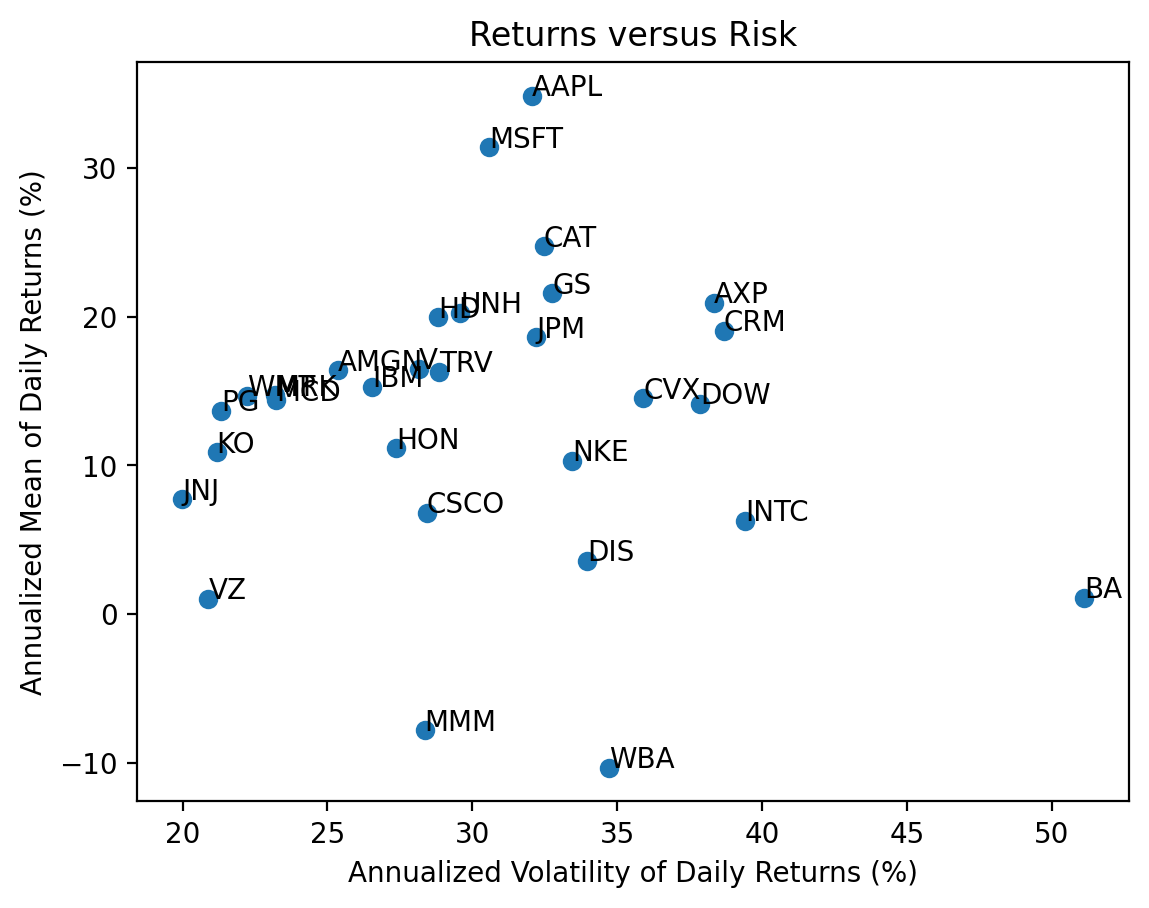

In [20]:
vols = returns2.std().mul(np.sqrt(252) * 100)
means = returns2.mean().mul(252 * 100)

plt.scatter(
    x=vols,
    y=means
)

plt.xlabel('Annualized Volatility of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')

# plt.xlim((0, vols.max() + 5))
# plt.ylim((0, means.max() + 5))

# add tickers to each point
for i in means.index: # loop over ticker index
    plt.text( # plots string s at coordinates x and y
        x=vols[i], # indexes volatility
        y=means[i], # indexes mean return
        s=i # ticker index
    )

plt.title('Returns versus Risk')
plt.show() # suppresses output of last function call

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

### Which stocks have the minimum and maximum total returns?

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

### Repeat the plot above with only the minimum and maximum total returns